In [1]:
import os
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from keras_facenet import FaceNet
from tqdm import tqdm
import umap.umap_ as umap
import pandas as pd

In [ ]:
df = pd.read_csv('fairface_label_val.csv')
df

,file,age,gender,race,service_test
0,val/1.jpg,3-9,Male,East Asian,False
1,val/2.jpg,50-59,Female,East Asian,True
2,val/3.jpg,30-39,Male,White,True
3,val/4.jpg,20-29,Female,Latino_Hispanic,True
4,val/5.jpg,20-29,Male,Southeast Asian,False
...,...,...,...,...,...
10949,val/10950.jpg,30-39,Male,White,True
10950,val/10951.jpg,50-59,Male,White,False
10951,val/10952.jpg,60-69,Male,Latino_Hispanic,False
10952,val/10953.jpg,20-29,Female,East Asian,False


In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [ ]:
embedder = FaceNet()

In [ ]:
def load_image(img_path):
    img = plt.imread(img_path)
    if img.shape[-1] == 4:
        img = img[..., :3]  # Discard the alpha channel if present
    return img

In [ ]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['green', 'yellow', 'red', 'blue', 'cyan', 'purple', 'orange'])

In [ ]:
path = 'val'

In [ ]:
embeddings = []
labels = []
y_label = []
for filename in os.listdir(path):
    if filename.endswith('.jpg'):
        img_path = os.path.join(path, filename)
        img = load_image(img_path)
        img = np.expand_dims(img, axis=0)  # Expand dimensions to add batch size of 1
        embedding = embedder.embeddings(img)
        embeddings.append(embedding[0])

        # Retrieve the race label from the DataFrame using the filename
        race_label = df.loc[df['file'] == 'val/'+filename, 'race'].values[0]
        labels.append(race_label)
        y_label.append(1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

In [ ]:
label_counts = Counter(labels)
print("Label counts:", label_counts)

Label counts: Counter({'White': 2085, 'Latino_Hispanic': 1623, 'Black': 1556, 'East Asian': 1550, 'Indian': 1516, 'Southeast Asian': 1415, 'Middle Eastern': 1209})


In [ ]:
embeddings = np.array(embeddings)
embeddings.shape

(10954, 512)

C:\Users\leo28\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


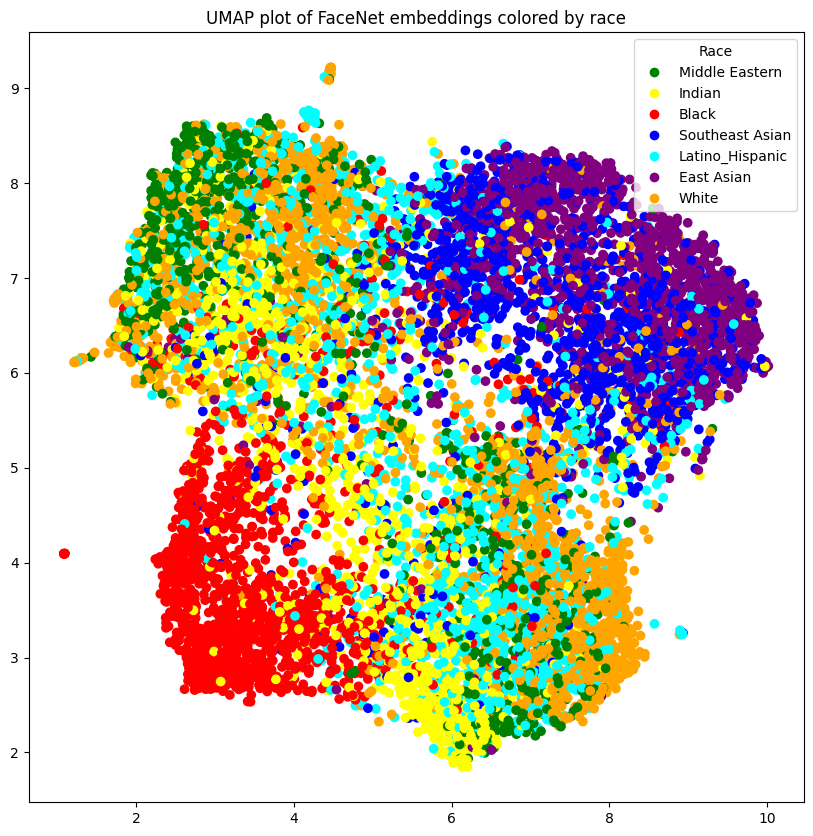

In [ ]:
# Perform UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
embeddings_2d = umap_reducer.fit_transform(embeddings)

# Convert race labels to numerical values
unique_labels = list(set(labels))
label_to_num = {label: num for num, label in enumerate(unique_labels)}
num_labels = [label_to_num[label] for label in labels]

# Plotting
plt.figure(figsize=(10, 10))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=num_labels, cmap=custom_cmap, alpha=1)
plt.legend(handles=scatter.legend_elements()[0], labels=unique_labels, title="Race")
plt.title('UMAP plot of FaceNet embeddings colored by race')
plt.show()

In [ ]:
import cv2

# Função de carregamento de imagem fornecida
def load_image_cifar(img_array):
    img = img_array
    if img.shape[-1] == 4:
        img = img[..., :3]  # Descartar o canal alpha, se presente
    img = cv2.resize(img, (160, 160))  # Redimensionar para 160x160
    img = img.astype(np.float32)
    img = (img - 127.5) / 127.5  # Normalizar a imagem
    return img

In [ ]:
# Carregar o dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Combinar conjuntos de treino e teste
x_data = np.concatenate((x_train, x_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0)

embeddings_cifar = []
labels_cifar = []
y_teste = []
for i in range(len(x_data)):
    img = load_image_cifar(x_data[i])
    img = np.expand_dims(img, axis=0)  # Expandir dimensões para adicionar batch size de 1
    embedding = embedder.embeddings(img)
    embeddings_cifar.append(embedding[0])
    labels_cifar.append('Not Face')
    y_teste.append(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━

KeyboardInterrupt: 

In [ ]:

# Convertendo para arrays numpy
embeddings_cifar = np.array(embeddings_cifar)
labels_cifar = np.array(labels_cifar)
y_teste = np.array(y_teste)

In [ ]:
print(embeddings_cifar.shape)
print(y_teste.shape)
labels_cifar.shape

(22663, 512)
(22663,)


(22663,)

Acurácia: 100.00%
F1 Score: 1.00


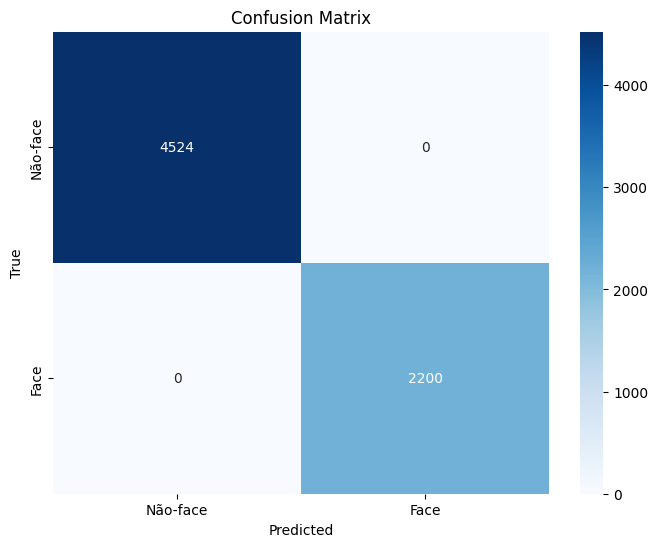

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que você já tenha os seguintes arrays
# embeddings: embeddings de faces
# embeddings_cifar: embeddings de imagens CIFAR-10
# y_label: rótulos para faces (1 para face)
# y_teste: rótulos para CIFAR-10 (0 para não-face)
# labels: rótulos das raças para cada face embedding

# Criar arrays numpy se não estiverem já nesse formato
embeddings = np.array(embeddings)
embeddings_cifar = np.array(embeddings_cifar)
y_label = np.array(y_label)
y_teste = np.array(y_teste)
labels = np.array(labels)

# Combinar embeddings e rótulos
X = np.concatenate((embeddings, embeddings_cifar), axis=0)
y = np.concatenate((y_label, y_teste), axis=0)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')

# Calcular a pontuação F1
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

# Calcular e plotar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não-face', 'Face'], yticklabels=['Não-face', 'Face'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
genders = []
for filename in os.listdir(path):
    if filename.endswith('.jpg'):
        # Recuperar o gênero a partir do DataFrame usando o nome do arquivo
        gender_label = df.loc[df['file'] == 'val/' + filename, 'gender'].values[0]
        genders.append(gender_label)
genders = np.array(genders)
genders

array(['Male', 'Male', 'Female', ..., 'Female', 'Male', 'Male'],
      dtype='<U6')

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que você já tenha os seguintes arrays
# embeddings: embeddings de faces
# genders: rótulos de gênero para as faces

# Convertendo para arrays numpy se não estiverem já nesse formato
embeddings = np.array(embeddings)
genders = np.array(genders)

# Mapear rótulos de gênero para valores numéricos
gender_map = {'Female': 0, 'Male': 1}
genders_numeric = np.array([gender_map[gender] for gender in genders])

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(embeddings, genders_numeric, test_size=0.2, random_state=42)

# Treinar o modelo XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')
# Calcular a pontuação F1
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')


# Calcular e plotar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()



: 

<Figure size 1000x600 with 0 Axes>

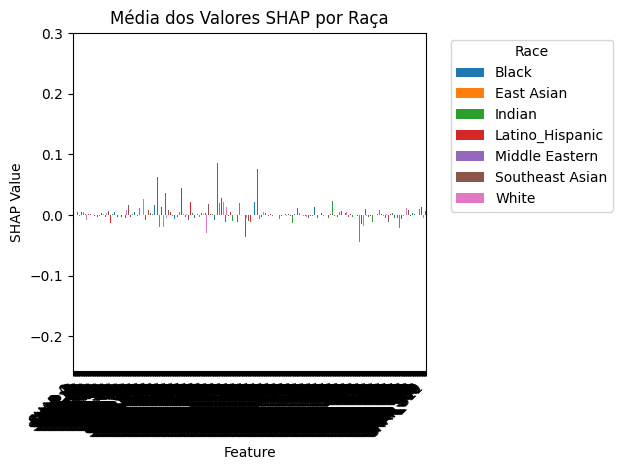

In [45]:
import numpy as np
import pandas as pd
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Supondo que você já tenha os seguintes arrays
# embeddings: embeddings de faces
# genders: rótulos de gênero para as faces
# labels: rótulos de raça para as faces

# Convertendo para arrays numpy se não estiverem já nesse formato
embeddings = np.array(embeddings)
genders = np.array(genders)
labels = np.array(labels)

# Mapear rótulos de gênero para valores numéricos
gender_map = {'Female': 0, 'Male': 1}
genders_numeric = np.array([gender_map[gender] for gender in genders])

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test, labels_train, labels_test = train_test_split(embeddings, genders_numeric, labels, test_size=0.2, random_state=42)

# Treinar o modelo XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Calcular os valores SHAP
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# Criar um DataFrame com os valores SHAP e rótulos demográficos
df_shap = pd.DataFrame(shap_values, columns=[f'SHAP_{i}' for i in range(shap_values.shape[1])])
df_shap['Race'] = labels_test

# Calcular a média dos valores SHAP por raça
shap_mean_by_race = df_shap.groupby('Race').mean()

# Plotar os resultados
plt.figure(figsize=(10, 6))
shap_mean_by_race.T.plot(kind='bar')
plt.title('Média dos Valores SHAP por Raça')
plt.xlabel('Feature')
plt.ylabel('SHAP Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [46]:
# Calculate SHAP values
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_train)

# Filter data by race
race_groups = labels

# Compute mean SHAP values for each race group
mean_shap_values = {}
for race, group_data in race_groups:
    mean_shap_values[race] = np.mean(shap_values[group_data.index], axis=0)

# Plot demographic parity
# You can use any visualization library like Matplotlib or Seaborn for plotting
# For example, you can plot bar charts showing mean SHAP values for each race group

# Example plotting code
import matplotlib.pyplot as plt

plt.bar(mean_shap_values.keys(), [np.mean(values) for values in mean_shap_values.values()])
plt.xlabel('Race')
plt.ylabel('Mean SHAP Value')
plt.title('Demographic Parity based on SHAP Values')
plt.show()

ValueError: too many values to unpack (expected 2)